In [1]:
#Setup
import matplotlib.pyplot as plt  # for generating plots
import matplotlib
import pandas as pd     # import the pandas library to read a .csv file
import numpy as np      # use py for numpy from now on
# this command tells Jupyter Notebook to plot in this space
%matplotlib inline

df = pd.read_csv('temporal.csv')   # read in the data to df

df.head(10)   # first 10 data rows

,Mes,data science,machine learning,deep learning,categorical,Unnamed: 5
0,1/1/2004,12,18,4,1,NaN
1,2/1/2004,12,21,2,1,NaN
2,3/1/2004,9,21,2,1,NaN
3,4/1/2004,10,16,4,1,NaN
4,5/1/2004,7,14,3,1,NaN
5,6/1/2004,9,17,3,1,NaN
6,7/1/2004,9,16,3,1,NaN
7,8/1/2004,7,14,3,1,NaN
8,9/1/2004,10,17,4,1,NaN
9,10/1/2004,8,17,4,1,NaN


In [2]:
#Example 1
df.describe ()  # see how the data is distributed - maxs, mins, means

,data science,machine learning,deep learning,categorical,Unnamed: 5
count,194.000000,194.000000,194.000000,194.000000,0.0
mean,20.953608,27.396907,24.231959,0.257732,NaN
std,23.951006,28.091490,34.476887,0.438517,NaN
min,4.000000,7.000000,1.000000,0.000000,NaN
25%,6.000000,9.000000,2.000000,0.000000,NaN
50%,8.000000,13.000000,3.000000,0.000000,NaN
75%,26.750000,31.500000,34.000000,1.000000,NaN
max,100.000000,100.000000,100.000000,1.000000,NaN


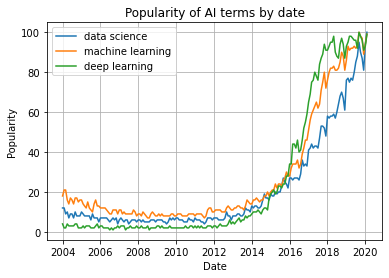

In [3]:
#Example 2
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])     # only display years, not months
#We apply the style to the visualization
df.head().style.format(format_dict)

plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

,Mes,data science,machine learning,deep learning,categorical,Unnamed: 5
0,01-2004,$12.00,1800.00%,4,1,nan
1,02-2004,$12.00,2100.00%,2,1,nan
2,03-2004,$9.00,2100.00%,2,1,nan
3,04-2004,$10.00,1600.00%,4,1,nan
4,05-2004,$7.00,1400.00%,3,1,nan


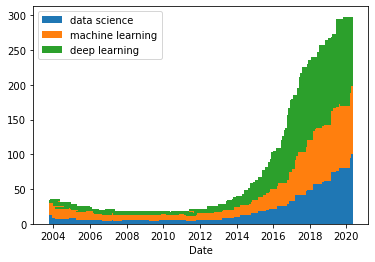

In [4]:
#Example 3
p1 = plt.bar(df['Mes'], df['data science'], len(df) )
p2 = plt.bar(df['Mes'], df['machine learning'],len(df),bottom=df['data science'])
p3 = plt.bar(df['Mes'], df['deep learning'],len(df), bottom=df['data science']+df['machine learning'] )

plt.legend((p1[0], p2[0], p3[0]), ('data science','machine learning', 'deep learning'))
plt.xlabel('Date')
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
df['Mes'] = pd.to_datetime(df['Mes'])
df.head().style.format(format_dict)

Question 1: Using the stacked bar chart, analyze the search history? Is one more popular than another? Be specific as to timing and quantity, as much as you can.

<PolarAxesSubplot:>

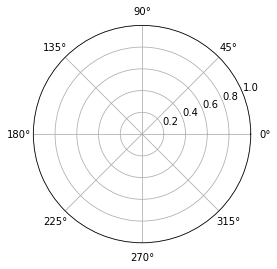

In [5]:
# Example 4
# Initialize plot with polar coordinates
plt.subplot(111, polar = True)

<BarContainer object of 1 artists>

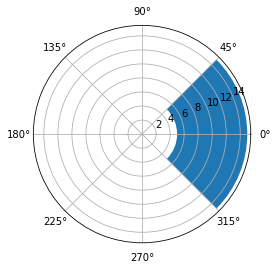

In [6]:
#Example 5
#add a bar to the polar coordinates
plt.subplot(111,polar=True)
plt.bar(x=0,height=10, width = np.pi/2, bottom = 5)
# angles are in radians - 180 degrees is pi radians

In [7]:
# Example 6
df_circle = pd.DataFrame(
       {
           'Name':['item '+ str(i) for i in list(range(1,51))],
           'Value':np.random.randint(low=10, high = 100, size = 50)
       })

#show first 5 rows
df_circle.head(5)

,Name,Value
0,item 1,87
1,item 2,40
2,item 3,74
3,item 4,57
4,item 5,96


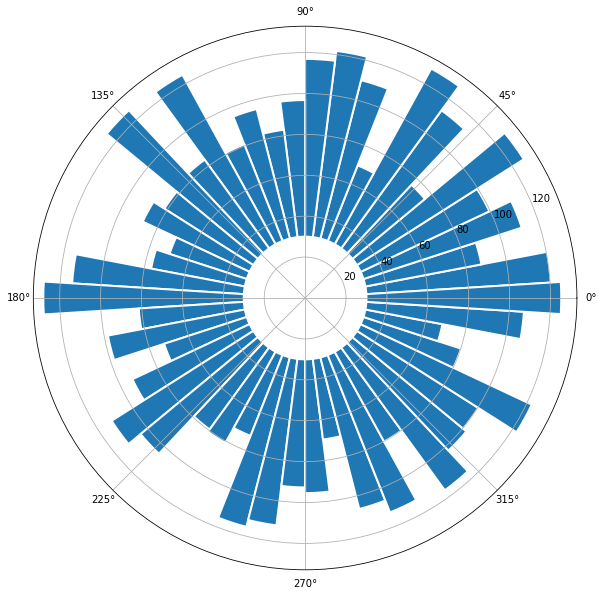

In [8]:
# Example 7
# A very basic circular barchart

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111,polar=True)

# remove grid
plt.axis='off'

# set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max in the dataset
max = df_circle['Value'].max()

# Now scale heights: and convert to new coordinates
# The smallest value (0) will be converted to the lowerLimit (10) and max will be 100
slope = (max-lowerLimit)/max
heights = slope * df_circle.Value + lowerLimit

# compute width of each bar - need to cover all 360 degrees (2*pi)
width = 2*np.pi /len(df_circle.index)

# compute the angle each bar is centered on
indexes = list(range(1, len(df_circle.index)+1))
angles = [element * width for element in indexes]
angles

# draw the bars
bars = ax.bar(
     x = angles,
     height = heights,
     width = width,
     bottom = lowerLimit,
     linewidth=2,
     edgecolor = "white")


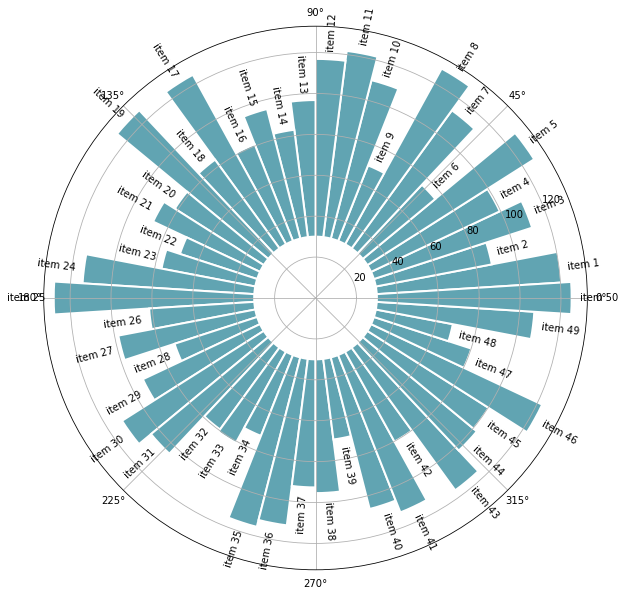

In [9]:
#Example 8
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111,polar=True)
plt.axis='off'

# draw the bars
bars = ax.bar(
     x = angles,
     height = heights,
     width = width,
     bottom = lowerLimit,
     linewidth=2,
     edgecolor = "white",
     color = "#61a4b2"
)
# a little space between bar and label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles,heights,df_circle["Name"]):
    #Labels are rotated - rotations must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation+180
    else:
        alignment="left"

    # Add the labels
    ax.text(
       x=angle,
       y=lowerLimit+bar.get_height() + labelPadding,
       s=label,
       ha=alignment,
       va = 'center',
       rotation = rotation,
       rotation_mode='anchor')


Question 2 What considerations would you use to organize something like this?

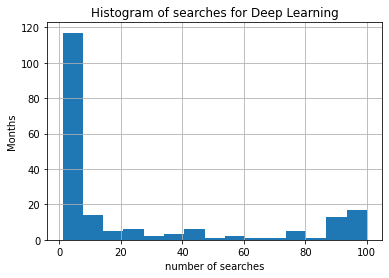

In [10]:
#Example 9
plt.hist(df['deep learning'], bins=15)
plt.xlabel('number of searches')
plt.ylabel('Months')
plt.title('Histogram of searches for Deep Learning')
plt.grid(True)

In [11]:
#Example 10
df.describe ()  # see how the data is distributed - maxs, mins, means

,data science,machine learning,deep learning,categorical,Unnamed: 5
count,194.000000,194.000000,194.000000,194.000000,0.0
mean,20.953608,27.396907,24.231959,0.257732,NaN
std,23.951006,28.091490,34.476887,0.438517,NaN
min,4.000000,7.000000,1.000000,0.000000,NaN
25%,6.000000,9.000000,2.000000,0.000000,NaN
50%,8.000000,13.000000,3.000000,0.000000,NaN
75%,26.750000,31.500000,34.000000,1.000000,NaN
max,100.000000,100.000000,100.000000,1.000000,NaN


Text(0, 0.5, 'Number of searches')

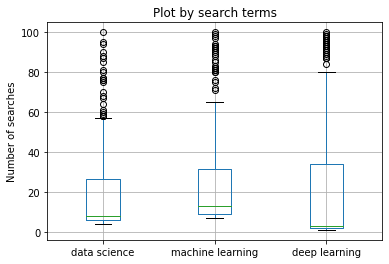

In [12]:
#Example 11
boxplot = df.boxplot(column=['data science','machine learning','deep learning'])
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

Text(0, 0.5, 'Number of searches')

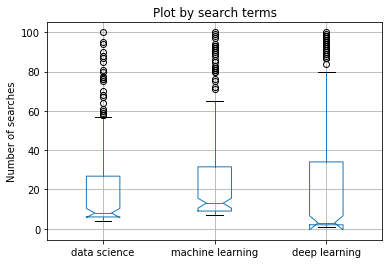

In [13]:
#Example 12
boxplot = df.boxplot(column=['data science','machine learning','deep learning'], notch=True)
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

Text(0, 0.5, 'Number of searches')

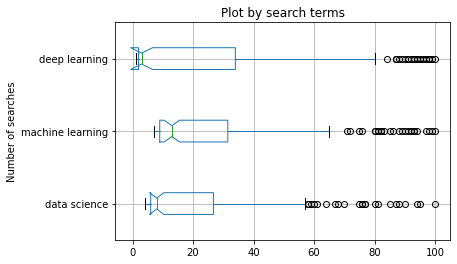

In [14]:
# Example 13
boxplot = df.boxplot(column=['data science','machine learning','deep learning'], notch=True, vert=False)
plt.title('Plot by search terms')
plt.ylabel('Number of searches')

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

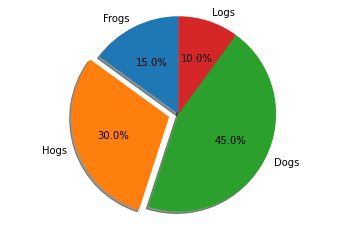

In [15]:
# Example 14
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]  # these are the percentages/parts of the whole
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)   # the pie starts at the top and goes counterclockwise
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

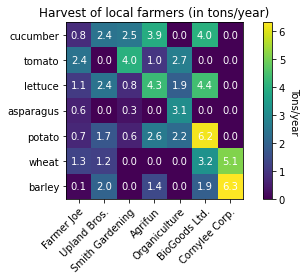

In [16]:
#Example 15
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")

# Create colorbar-scale
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Tons/year', rotation=-90, va="bottom")

fig.tight_layout()

Question 3: A heat map is very dense with data, so you need to consider how to structure it. For the farming data, one way to structure the y-axis would be to group the crop by time of year, so all the winter crops are together, all the spring, and so on. What other considerations could you use to organize this graph?

Text(0.5, 1.0, 'Bubble Scatter plot with Matplotlib')

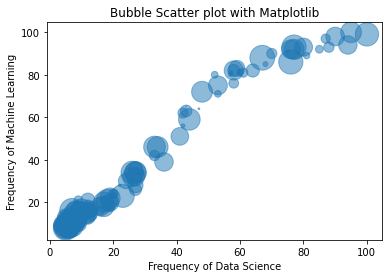

In [17]:
# Example 16
#creating 194 data points for color and size of bubble
N=194
colors = np.random.rand(N)
area = (25*np.random.rand(N))**2

df_bubble = pd.DataFrame({
    'Mes':df['Mes'],
    'data science':df['data science'],
    'machine learning':df['machine learning'],
    'deep learning':df['deep learning'],
    'Colors': colors,
    "bubble_size": area})

plt.scatter('data science','machine learning',
           s = 'bubble_size',
           alpha=0.5,
           data=df_bubble)
plt.xlabel("Frequency of Data Science")
plt.ylabel("Frequency of Machine Learning")
plt.title("Bubble Scatter plot with Matplotlib")

Text(0.5, 1.0, 'Bubble Scatter plot with Colors using Matplotlib')

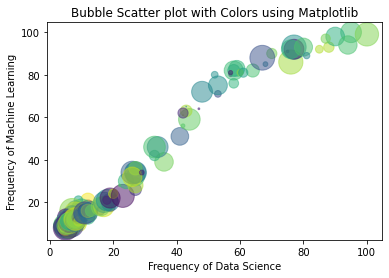

In [18]:
# Example 17
plt.scatter('data science','machine learning',
           s = 'bubble_size',c='Colors',
           alpha = 0.5,data = df_bubble)
plt.xlabel("Frequency of Data Science")
plt.ylabel("Frequency of Machine Learning")
plt.title("Bubble Scatter plot with Colors using Matplotlib")